## **Import Library**

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, roc_curve
)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

## **Membaca Dataset**

In [22]:
# Load dataset
df = pd.read_csv("https://raw.githubusercontent.com/farrelrassya/teachingMLDL/refs/heads/main/02.%20Deep%20Learning/Dataset/income.csv")

In [23]:
# Cek nilai unik income
print("Nilai unik kolom income:", df['income'].unique())

Nilai unik kolom income: ['<=50K' '>50K' '<=50K.' '>50K.']


## **Pra-Pemrosesan Data**

In [24]:
# Encode income: <=50K → 0, >50K → 1
df['income'] = df['income'].apply(lambda x: 0 if "<=50K" in x else 1)

In [25]:
# Encode kolom kategorik lainnya
df_encoded = df.copy()
label_encoders = {}
for column in df_encoded.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df_encoded[column] = le.fit_transform(df_encoded[column])
    label_encoders[column] = le

# **Pemisahan Fitur dan Target**

In [26]:
# Split data
X = df_encoded.drop('income', axis=1)
y = df_encoded['income']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **Pelatihan Model**

In [27]:
# Train model
knn = KNeighborsClassifier(n_neighbors=5)
dt = DecisionTreeClassifier(random_state=42)
knn.fit(X_train, y_train)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

## **Prediksi dan Evaluasi**

In [28]:
# Predictions
knn_pred = knn.predict(X_test)
dt_pred = dt.predict(X_test)
knn_proba = knn.predict_proba(X_test)[:, 1]
dt_proba = dt.predict_proba(X_test)[:, 1]

In [29]:
# Evaluation function
def evaluate_model(y_true, y_pred, y_proba, model_name):
    print(f"\n--- {model_name} ---")
    print(f"Akurasi  : {accuracy_score(y_true, y_pred):.4f}")
    print(f"Presisi  : {precision_score(y_true, y_pred):.4f}")
    print(f"Recall   : {recall_score(y_true, y_pred):.4f}")
    print(f"F1 Score : {f1_score(y_true, y_pred):.4f}")
    print(f"AUC ROC  : {roc_auc_score(y_true, y_proba):.4f}")

evaluate_model(y_test, knn_pred, knn_proba, "K-NN")
evaluate_model(y_test, dt_pred, dt_proba, "Decision Tree")


--- K-NN ---
Akurasi  : 0.7773
Presisi  : 0.5629
Recall   : 0.3401
F1 Score : 0.4240
AUC ROC  : 0.6853

--- Decision Tree ---
Akurasi  : 0.8095
Presisi  : 0.6032
Recall   : 0.6132
F1 Score : 0.6081
AUC ROC  : 0.7427


# **Interpretasi Model**
* **Akurasi:**

  Decision Tree (80.95%) lebih unggul dibanding K-NN (77.73%), menunjukkan model ini lebih banyak membuat prediksi yang benar.

* **Presisi:**

  Decision Tree (60.32%) lebih tinggi daripada K-NN (56.29%), artinya model ini lebih jarang memberikan false positive. Cocok jika kita ingin meminimalkan kesalahan dalam mendeteksi individu dengan penghasilan tinggi.

* **Recall:**

  Decision Tree (61.32%) jauh lebih tinggi daripada K-NN (34.01%). Berarti Decision Tree lebih baik dalam menangkap individu berpenghasilan tinggi.

* **F1 Score:**

  Decision Tree (60.81%) lebih unggul dibanding K-NN (42.40%), yang berarti keseimbangan antara presisi dan recall lebih baik pada Decision Tree.

* **AUC ROC:**

  Decision Tree (74.27%) lebih tinggi daripada K-NN (68.53%). Menunjukkan bahwa Decision Tree lebih baik dalam membedakan kelas <=50K dan >50K.Terlihat juga pada grafik ROC, di mana kurva Decision Tree berada di atas K-NN.



## **Visualisasi ROC Curve**

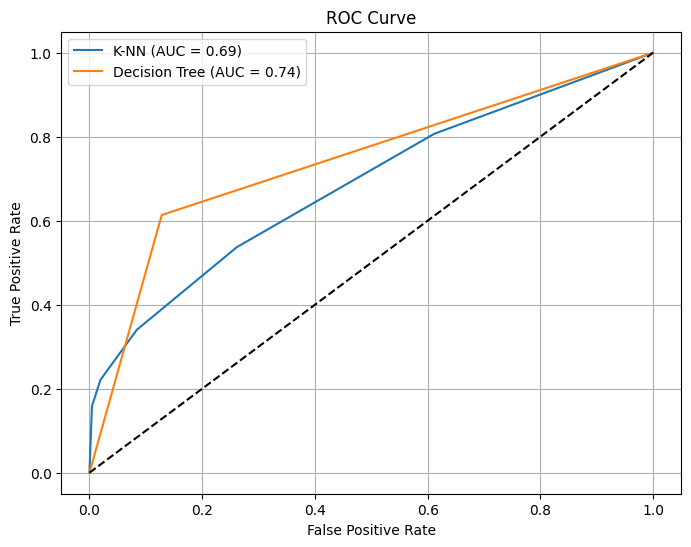

In [30]:
# Plot ROC
fpr_knn, tpr_knn, _ = roc_curve(y_test, knn_proba)
fpr_dt, tpr_dt, _ = roc_curve(y_test, dt_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr_knn, tpr_knn, label='K-NN (AUC = {:.2f})'.format(roc_auc_score(y_test, knn_proba)))
plt.plot(fpr_dt, tpr_dt, label='Decision Tree (AUC = {:.2f})'.format(roc_auc_score(y_test, dt_proba)))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

# **Kesimpulan**
1. Decision Tree adalah model yang lebih baik dibandingkan K-NN dalam dataset ini.
  * Akurasi lebih tinggi.
  * Presisi dan recall lebih seimbang.
  * Performa keseluruhan lebih stabil berdasarkan AUC ROC.
2. Jika tujuan kita adalah menangkap sebanyak mungkin individu dengan penghasilan tinggi (>50K), maka Decision Tree lebih disarankan karena recall-nya lebih baik.
3. Jika kita ingin model yang lebih stabil untuk klasifikasi penghasilan, Decision Tree juga lebih unggul dibanding K-NN.

# **Penjelasan Persamaan**

## **1. Akurasi**

   Rumus:$$
   \text{Akurasi} = \frac{TP + TN}{TP + TN + FP + FN}
   $$

Penjelasan:

* Mengukur proporsi prediksi yang benar dari semua prediksi yang dibuat.
* TP = True Positive, TN = True Negative
* FP = False Positive, FN = False Negative

Interpretasi:

* Nilai akurasi berkisar antara 0 hingga 1 (0% sampai 100%).
* Semakin mendekati 1, semakin baik.
* Akurasi bisa menipu jika kelas tidak seimbang (misalnya 90% data bernilai 0)

## **2. Presisi**

   Rumus:$$
   \text{Presisi} = \frac{TP}{TP + FP}
   $$

Penjelasan:

* Mengukur berapa banyak dari prediksi positif yang benar-benar positif.
* Fokus pada “ketepatan” model saat bilang positif.

Interpretasi:
* Nilai berkisar antara 0 – 1.
* Semakin mendekati 1, semakin baik → berarti sedikit kesalahan saat memprediksi positif.
* Cocok untuk kasus di mana false positive harus dihindari

## **3. Recall**

   Rumus:$$
   \text{Recall} = \frac{TP}{TP + FN}
   $$

Penjelasan:
* Mengukur berapa banyak kasus positif yang berhasil ditangkap model.
* Fokus pada “kelengkapan”.

Interpretasi:
* Nilai antara 0 – 1.
* Semakin mendekati 1, semakin baik → artinya model jarang melupakan kasus positif (false negative rendah).
* Cocok saat penting menangkap semua kasus positif, meskipun ada false positive.

## **4. F1 Score**
   Rumus:$$
   F1 = 2 \cdot \frac{\text{Presisi} \cdot \text{Recall}}{\text{Presisi} + \text{Recall}}
   $$

Penjelasan:
* Kombinasi harmonis antara presisi dan recall.
* Berguna saat kita perlu menyeimbangkan keduanya, terutama saat data tidak seimbang.

Interpretasi:
* Nilai antara 0 – 1.
* Semakin mendekati 1, semakin baik.
* Jika salah satu dari presisi atau recall rendah → F1 juga akan rendah.

## **5. AUC (ROC)**
Penjelasan ROC:
* Grafik antara True Positive Rate (Recall) vs False Positive Rate di berbagai ambang keputusan.

AUC (Area Under Curve):
* Luas di bawah kurva ROC, nilai antara 0 dan 1.
* AUC = 0.5 → model seburuk tebak-tebakan acak.
* AUC = 1.0 → model sempurna.

Interpretasi:
* AUC mendekati 1 → model sangat baik dalam membedakan kelas positif dan negatif.
* AUC di atas 0.7 sudah dianggap cukup baik, di atas 0.8 sangat baik.
